In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import bernoulli

### All the methods about multi-armed bandits are about exploit and explore. A good algorithm should be able to precisely find the best bandit within a few steps. Different rules to choose exploit or explore are tested here.    

## Epsilon Greedy

In [124]:
# Bandit
class Bandit:
    def __init__(self, m):
        self.m = m
        self.N = 0
        self.mean = 0
        self.ber = bernoulli(self.m)
    
    def pull(self):
        return self.ber.rvs()
    
    def update(self, x):
        self.N += 1
        self.mean = self.mean*(self.N-1)/self.N + x/self.N
        

In [125]:
# Experiment
def create_bandits(m_list):
    return [Bandit(m_list[i]) for i in range(len(m_list))]

In [132]:
def epsilon_greedy(t, eps, bandits):
    ban_size = len(bandits)
    data = np.empty(t)
    cho_list = np.empty(t)
    
    for i in range(t):
        rand_num = np.random.rand()
        if  rand_num < eps:
        # Instead of the fixed eps, we can use decay eps to make our algorithm more efficient
        #if  rand_num < 1/(i + 1):
            cho = np.random.choice(ban_size)
        else:
            cho = np.argmax([b.mean for b in bandits])
        x = bandits[cho].pull()
        bandits[cho].update(x)
        
        data[i] = x
        cho_list[i] = cho
        
    cumulative_average = np.cumsum(data) / (np.arange(t) + 1)
    
    for i in range(t):
        if i % 1500 == 0:
            print(cho_list[i])
    
    # plot
    plt.plot(cumulative_average)
    for b in bandits:
        plt.plot(np.ones(t)*b.m)
    plt.xscale('log')
    plt.show()
    
    return cumulative_average

0.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0


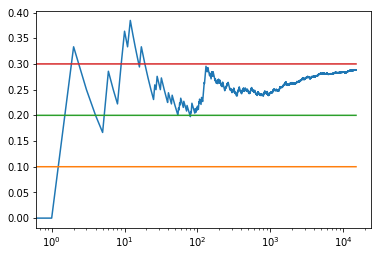

array([0.        , 0.        , 0.33333333, ..., 0.28843846, 0.2884859 ,
       0.28853333])

In [133]:
# simulation
bandits = create_bandits([0.1, 0.2, 0.3])
epsilon_greedy(15000, 0.1, bandits)

## Thompson Sampling

#### In this case, suppose bandits have bernoulli distribution with theta, and theta is sampled from a beta distribution, then posterior distribution of theta is still a beta distribution.

In [138]:
# We choose the bandit based on the samples from our posterior distributions
class ThompsonBandit:
    def __init__(self, m):
        self.m = m
        self.a = 1
        self.b = 1
        self.ber = bernoulli(self.m)
        self.dist = beta(self.a, self.b)
    
    def pull(self):
        return self.ber.rvs()
    
    def update(self, x):
        self.a += x
        self.b += (1-x)
        self.dist = beta(self.a, self.b)

In [139]:
# Experiment
def create_bandits(m_list):
    return [ThompsonBandit(m_list[i]) for i in range(len(m_list))]

In [140]:
def thompson_sampling(t, bandits):
    ban_size = len(bandits)
    data = np.empty(t)
    cho_list = np.empty(t)
    
    for i in range(t):
        cho = np.argmax([b.dist.rvs() for b in bandits])
        x = bandits[cho].pull()
        bandits[cho].update(x)
        
        data[i] = x
        cho_list[i] = cho
        
    cumulative_average = np.cumsum(data) / (np.arange(t) + 1)
    
    for i in range(t):
        if i % 1500 == 0:
            print(cho_list[i])
    
    # plot
    plt.plot(cumulative_average)
    for b in bandits:
        plt.plot(np.ones(t)*b.m)
    plt.xscale('log')
    plt.show()
    
    return cumulative_average

0.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0


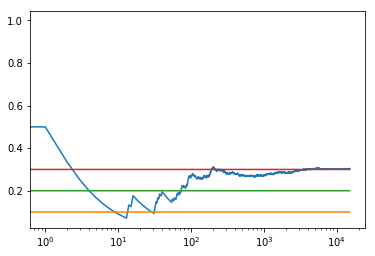

array([1.        , 0.5       , 0.33333333, ..., 0.30397386, 0.3039536 ,
       0.30393333])

In [141]:
# simulation
bandits = create_bandits([0.1, 0.2, 0.3])
thompson_sampling(15000, bandits)